In [1]:
import os
os.environ["OPENBLAS_MAIN_FREE"] = "1"
os.system(f"taskset -p 0xff {os.getpid()}")

256

In [2]:
import sys
sys.version

import pandas as pd

In [3]:
import gensim
from nltk.util import ngrams
import nltk
import pythainlp

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

from collections import Counter
def get_top_freq_word(series, n):
    all_word = [a for b in series.tolist() for a in b]
    Counter_ = Counter(all_word)
    most_occur = Counter_.most_common(n) 
    return most_occur

def load_dict(file_nm):
    bigram_custom = pd.read_csv(file_nm,header=None,usecols=[0])
    bigram_custom = bigram_custom[0].tolist()
    return bigram_custom

# import

In [4]:
# tok with custom dict [priority topwords, foodwords]
not_remove_stopwords = pd.read_parquet('../../../data/train_chunk/result/dc_topword_food_dict/')

In [5]:
remove_stopwords = pd.read_parquet('../../../data/train_chunk/result/dc_topword_food_dict_remove_single_words_1K')

In [6]:
# output
not_remove_stopwords_dtm = not_remove_stopwords['tokenized'].tolist()
remove_stopwords_dtm = remove_stopwords['tok_remove_topwords'].tolist()

In [8]:
remove_stopwords.head(1)

,review,review_nospace,tokenized,tok_remove_topwords
0,ไปเที่ยวเกาะล้าน คงพลาดไม่ได้กับร้านอาหารขึ้นช...,ไปเที่ยวเกาะล้านคงพลาดไม่ได้กับร้านอาหารขึ้นชื...,"[ไป, เที่ยว, เกาะ, ล้าน, คง, พลาดไม่ได้, กับ, ...","[เกาะ, ล้าน, พลาดไม่ได้, เกาะ, ครัวพวงพยอม, เบ..."


In [9]:
to_remove = ['', '\t', '\x0b', '{', '}', '£', '¤', '¥', '¦', '«', '°', '´', '·',
'º', '»', '¼', '¿', '×', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ê',
'í', 'î', 'ñ', 'ó', 'ô', 'ö', 'û', 'č', 'ť', 'ơ', 'ʔ', 'ʕ', 'ˇ',
'ˍ', '̀', '́', '̫', 'ε', 'ο', 'σ', 'ω', 'д', '構', '樓', '歡', '段', '気', '水', '沢', '泰', '海', '添', '港', '湯', '準',
'滷', '然', '焼', '特', '用', '番', '異', '的', '県', '私', '穩', '第', '終',
'経', '結', '美', '老', '而', '肉', '苗', '菜', '華', '蕘', '薁', '街', '貢',
'身', '运', '近', '道', '鄉', '酒', '野', '開', '阪', '附', '雖', '雰', '題',
'顧', '食', '飯', '香', '鮪', '낙', '볶', '음', '지', '\ue404', '\uf020',
'\uf04a', '\uf04c', '\uf701', '\uf701วชั่น', '\uf705ากวางเมนู',
'\uf705ุนต', '\uf70a', '\uf70aง', '\uf70aงจาน', '\uf70aงหรรษา',
'\uf70aงได\uf70b', '\uf70aนขาหมู', '\uf70aนชิลท่ีทาง',
'\uf70aนเฟรนฟราย', '\uf70aบเนื้อโค', '\uf70aบและ', '\uf70aว',
'\uf70aา', '\uf70aาง', '\uf70aางเน้ือโคขุนเมนูเป',
'\uf70aางเฟรนฟราย', '\uf70aาน', '\uf70aานได', '\uf70aาย',
'\uf70aายเนื้อโค', '\uf70aาเป\uf712นร', '\uf70aาเมนูปลา',
'\uf70aูอบชสีก', '\uf70b', '\uf70bง', '\uf70bงแท', '\uf70bมแซ',
'\uf70bวกลับ', '\uf70bวก็', '\uf70bวยหอมเมนู', '\uf70bวไม',
'\uf70bา', '\uf70bาน', '\uf70bานเมนูตํา', '\uf70bานแต',
'\uf70bารับรอง', '\uf70bาว', '\uf70bาฯลฯ', '\uf70bาได',
'\uf70bุงเริง', '\uf70bูสึก', '\uf70cกคอหมู', '\uf70cกไม',
'\uf70d', '\uf70e', '\uf70eมแอนด\uf70eเรสเตอร', '\uf712',
'\uf712ด', '\uf712ดร', '\uf712ดไก', '\uf712น', '\uf712นตัว',
'\uf712นอีก', '\uf712นเน้ือโคขุนกวางอกเป', '\uf714', '︽', '﹋', '﹌',
'﹏', '！', '％', '（', '）', '，', '／', '５', '：', '；', '＜', '＞', '？',
'＠', '＾', '＿', '｀', '｡', '･', 'ｰ', 'ﾟ', 'ﾠ', '￣', '￼','ら', 'り', 'る', 'れ', 'を', 'ん', '゜', 'ゝ', 'ゞ', 'ア', 'イ', 'ク', 'サ',
'ス', 'タ', 'チ', 'ッ', 'ツ', 'ニ', 'ノ', 'バ', 'ビ', 'フ', 'ブ', 'ベ', 'メ',
'ュ', 'ョ', 'ラ', 'リ', 'ル', 'ヮ', 'ン', 'ー', 'ヽ', 'ヾ', 'ㅠ', '一', '不',
'且', '中', '丸', '丼', '也', '人', '但', '住', '供', '們', '値', '偏', '元',
'光', '共', '内', '刺', '南', '去', '友', '台', '号', '司', '味', '和', '咸',
'品', '唯', '商', '喜', '囲', '國', '在', '壱', '多', '大', '天', '太', '好',
'定', '寿', '屋', '山', '常', '年', '庄', '店', '廣', '很', '得', '意', '房',
'提', '放', '方', '日', '有', '朋', '本', '東', '栗',  '…', '\u2028', '\u202a', '\u202c', '′', '″', '‼',
'₩', '€', '⃣', '℅', '←', '→', '↓', '↖', '∀', '∂', '∇', '√', '∩',
'≦', '≧', '⊙', '⌂', '⌒', '⌓', '⌛', '⏭', '⏰น', '⏳', '␥', '①', '②',
'╯', '╰', '╹', '■', '■ใช้มะนาวสด', '□', '▪', '▫', '▲', '▶', '▼',
'▽', '◀', '◆', '◇', '◉', '○', '◎', '●', '●ไลน์ขนมหวาน',
'●ไลน์ซูชิ', '◕ฺ', '◡', '☀', '☄', '★', '☎', '☕', '☘', '☝', '☺',
'♂', '♉', '♟', '♢', '♣', '♤', '♥', '♧', '♨', '♫', '⚓', '⚠', '⚡',
'⛄', '⛅', '⛤', '⛧', '⛱', '⛳', '⛵', '⛺', '✅', '✈', '✋', '✌', '✍',
'✏', '✔', '✖', '✨', '✩', '✮', '✳', '❀', '❂', '❄', '❌', '❎', '❓',
'❔', '❕', '❗', '❣', '❤', '➡', '➰', '⭐', '⭕', '\u3000', '、', '。',
'《', '》', '「', '」', '〜', '〰', 'あ', 'い', 'う', 'お', 'か', 'が', 'き',
'く', 'こ', 'さ', 'し', 'す', 'そ', 'た', 'だ', 'ち', 'っ', 'つ', 'て', 'で',
'と', 'ど', 'な', 'に', 'の', 'は', 'ぶ', 'べ', 'ほ', 'ま', 'み', 'も', 'ゃ']

In [12]:
# remove_stopwords['tok_remove_topwords_misc_foodwords'] = remove_stopwords['tok_remove_topwords'].apply(lambda x: [w for w in x if w not in to_remove])

# custom_dict_wongnai = pd.read_csv('../../../data/food_dictionary.txt',header=None,names=['word'])
# food_list = custom_dict_wongnai['word'].tolist()

# remove_stopwords['tok_remove_topwords_misc_foodwords'] = remove_stopwords['tok_remove_topwords_misc_foodwords'].apply(lambda x: [w for w in x if w not in food_list])
# remove_stopwords.to_parquet('../../../data/train_chunk/result/dc_topword_food_dict_remove_single_words_1K_misc_foodwords')

In [4]:
remove_stopwords = pd.read_parquet('../../../data/train_chunk/result/dc_topword_food_dict_remove_single_words_1K_misc_foodwords')
remove_stopwords_misc_food_dtm = remove_stopwords['tok_remove_topwords_misc_foodwords'].tolist()

In [5]:
import gensim.corpora as corpora
from gensim import models

def get_lda_input(data_words, mode=None):
    
    id2word = corpora.Dictionary(data_words)
    corpus = [id2word.doc2bow(text) for text in data_words]

    if mode == 'tfidf':
        tfidf = models.TfidfModel(corpus)
        corpus = tfidf[corpus]
    
    return id2word, corpus

# Gensim

In [6]:
from gensim.models import CoherenceModel

def run_simple_model(list_of_data_words):
    
    for data_words in list_of_data_words:

        id2word, corpus = get_lda_input(data_words)

        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               chunksize=100,
                                               passes=10,
                                               per_word_topics=True,
                                               workers = 15)

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        print('\nCoherence Score: ', coherence_lda)

In [7]:
# run_simple_model([data_words])

# optimised number of topics

In [8]:
from sklearn.model_selection import KFold
import numpy as np

def kfold_lda_model(dtm, num_top, num_folds):
    
    folds = KFold(n_splits = num_folds, shuffle=True, random_state=543)
    ll_ls = list()
    preplex_ls = list()
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds.split(dtm)):
        
        # extracting train/valid set
        X_train, X_val = dtm[trn_idx], dtm[val_idx]
        
        # fit
        model = LatentDirichletAllocation(n_components=num_top, random_state=0, n_jobs=15)
        model.fit(X_train)
        
        ll_ls.append(model.score(X_val))
        preplex_ls.append(model.perplexity(X_val))
        
        # clear
        del model
        gc.collect()
    
    ll_scr = np.mean(ll_ls)
    preplex_scr = np.mean(preplex_ls)
                
    return ll_scr, preplex_scr

In [9]:
from sklearn.model_selection import KFold
from gensim.models import CoherenceModel
import numpy as np

def train_gensim(data_words, num_top, bow_mode=None):
    
    # init
    coherence_ls = list()
    id2word, corpus = get_lda_input(data_words, bow_mode)

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_top, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True,
                                           workers = 15)

    # score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    # log
    coherence_score = coherence_model_lda.get_coherence()
                    
    return coherence_score

In [10]:
import gc
import time
def optimise_num_toipics(dtm, mode, bow_mode=None):
    
    # init 
    num_topics = range(2,21)
    res = dict()
    num_top_ls = list()
    
    if mode == 'sklearn':
        ll_ls = list()
        preplex_ls = list()
    if mode == 'gensim':
        coherence_ls = list()
    
    # process
    for num_top in num_topics:
        
        tik = time.time()
        
        # fit
        if mode == 'sklearn':
            ll_scr, preplex_scr = kfold_lda_model(dtm, num_top, num_folds = 5)
        if mode == 'gensim':
            coherence_scr = train_gensim(dtm, num_top, bow_mode)
        
        # log
        num_top_ls.append(num_top)
        if mode == 'sklearn':
            ll_ls.append(ll_scr)
            preplex_ls.append(preplex_scr)
        if mode == 'gensim':
            coherence_ls.append(coherence_scr)
        
        toc = time.time()
        
        # info
        if mode == 'sklearn':
            print(f'num_topics {num_top} | process_time {toc - tik:.2f} s | ll_score {ll_scr:,.2f} | preplex_score : {preplex_scr:,.2f}') 
        if mode == 'gensim':
            print(f'num_topics {num_top} | process_time {toc - tik:.2f} s | coherence_score {coherence_scr:,.4f}') 

    res['num_topics'] = num_top_ls
    
    if mode == 'sklearn':
        res['log_likelihood_score'] = ll_ls
        res['preplexity_score'] = preplex_ls
    if mode == 'gensim':
        res['coherence_score'] = coherence_ls
    
    return res

# TF

In [32]:
score_tf_gensim = optimise_num_toipics(remove_stopwords_misc_food_dtm, mode='gensim')

num_topics 2 | process_time 296.43 s | coherence_score 0.4809
num_topics 3 | process_time 286.32 s | coherence_score 0.4599
num_topics 4 | process_time 310.59 s | coherence_score 0.4550
num_topics 5 | process_time 350.59 s | coherence_score 0.4318
num_topics 6 | process_time 329.25 s | coherence_score 0.4192
num_topics 7 | process_time 335.21 s | coherence_score 0.4471
num_topics 8 | process_time 361.51 s | coherence_score 0.4488
num_topics 9 | process_time 362.04 s | coherence_score 0.5270
num_topics 10 | process_time 421.46 s | coherence_score 0.5161
num_topics 11 | process_time 391.73 s | coherence_score 0.4862
num_topics 12 | process_time 378.61 s | coherence_score 0.4765
num_topics 13 | process_time 422.68 s | coherence_score 0.4140
num_topics 14 | process_time 395.31 s | coherence_score 0.4573
num_topics 15 | process_time 406.48 s | coherence_score 0.4333
num_topics 16 | process_time 419.98 s | coherence_score 0.4499
num_topics 17 | process_time 425.00 s | coherence_score 0.4387


# TFIDF

In [33]:
score_tfidf_gensim = optimise_num_toipics(remove_stopwords_misc_food_dtm, mode='gensim', bow_mode='tfidf')

num_topics 2 | process_time 332.48 s | coherence_score 0.4349
num_topics 3 | process_time 339.37 s | coherence_score 0.5279
num_topics 4 | process_time 340.96 s | coherence_score 0.5536
num_topics 5 | process_time 356.12 s | coherence_score 0.5011
num_topics 6 | process_time 365.57 s | coherence_score 0.5437
num_topics 7 | process_time 365.84 s | coherence_score 0.5321
num_topics 8 | process_time 371.65 s | coherence_score 0.4938
num_topics 9 | process_time 383.40 s | coherence_score 0.5160
num_topics 10 | process_time 400.82 s | coherence_score 0.5334
num_topics 11 | process_time 398.29 s | coherence_score 0.5634
num_topics 12 | process_time 410.55 s | coherence_score 0.5199
num_topics 13 | process_time 429.49 s | coherence_score 0.5139
num_topics 14 | process_time 465.72 s | coherence_score 0.4936
num_topics 15 | process_time 437.54 s | coherence_score 0.5491
num_topics 16 | process_time 466.90 s | coherence_score 0.5519
num_topics 17 | process_time 504.42 s | coherence_score 0.5506


In [34]:
import matplotlib.pyplot as plt
import math

def show_optimise_topic_number(res):
    
    y = [int(c) for c in res['num_topics']]
    res = pd.DataFrame(res).set_index('num_topics')['coherence_score'].plot();
    yint = range(min(y), math.ceil(max(y))+1);
    plt.xticks(yint);
    
    return res

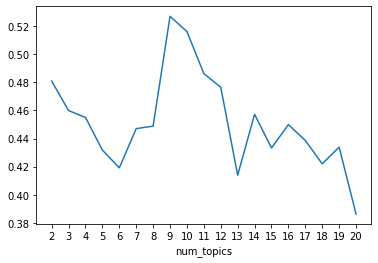

In [35]:
show_optimise_topic_number(score_tf_gensim);

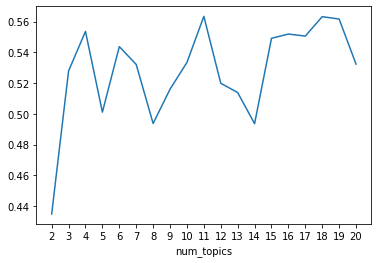

In [36]:
show_optimise_topic_number(score_tfidf_gensim);

# model

In [11]:
import joblib
def fit_lda_model(data_words, bow_mode, num_topics, file_nm=None):
    
    id2word, corpus = get_lda_input(data_words, bow_mode)

    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True,
                                           workers = 15)
    
    # saving
    if file_nm is not None:
        joblib.dump(lda_model, file_nm)
    
    return lda_model

In [20]:
%%time 
model = fit_lda_model(remove_stopwords_misc_food_dtm, bow_mode='tfidf', num_topics=18,
                                            file_nm='model/20200414_best_not_remove_stopw_misc_food_18topics.pkl')

CPU times: user 7min 24s, sys: 1min 34s, total: 8min 59s
Wall time: 8min 15s


In [21]:
# best_not_remove_stopw_model = joblib.load('model/20200402_best_not_remove_stopw.pkl')
# best_remove_stopw_model = joblib.load('model/20200402_best_remove_stopw.pkl')
# model = joblib.load('model/20200414_best_not_remove_stopw_misc_food.pkl')

# viz

In [22]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [23]:
model = model
dtm = remove_stopwords_misc_food_dtm

id2word, corpus = get_lda_input(dtm, mode='tfidf')

In [24]:
%%time
pyLDAvis.gensim.prepare(model, corpus, id2word, n_jobs = 15)

CPU times: user 1min 9s, sys: 334 ms, total: 1min 9s
Wall time: 1min 13s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.339788  0.012347       1        1  23.225044
6      0.331314  0.064144       2        1  22.415459
5      0.087236 -0.210576       3        1   8.668472
17    -0.035122 -0.008233       4        1   5.183857
10    -0.054069  0.008532       5        1   3.479461
0     -0.052575  0.011437       6        1   3.195381
16    -0.052712  0.010158       7        1   3.098862
15    -0.052848  0.010978       8        1   3.059627
13    -0.053409  0.012080       9        1   2.975711
2     -0.052831  0.010987      10        1   2.953310
11    -0.052960  0.012297      11        1   2.946478
1     -0.051353  0.008656      12        1   2.910053
7     -0.050325  0.012213      13        1   2.774052
12    -0.051249  0.010572      14        1   2.754167
3     -0.050933  0.007605      15        1   2.700638
4     -0.050252  0.009546      16        1   2.674393
9     -0.049139  0.009293      17        1   2.526923
14    -0.048563  0.007962      18        1   2.458113, topic_info=                  Term        Freq       Total Category  logprob  loglift
84              รสชาติ  800.000000  800.000000  Default  30.0000  30.0000
23                ราคา  809.000000  809.000000  Default  29.0000  29.0000
34                 ชอบ  746.000000  746.000000  Default  28.0000  28.0000
54               อร่อย  708.000000  708.000000  Default  27.0000  27.0000
79              บริการ  546.000000  546.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
6728               อาย    9.493598   13.356250  Topic18  -5.8248   3.3644
10027            สตาร์    4.930035    6.665197  Topic18  -6.4801   3.4042
358    มีที่จอดรถสะดวก    9.035250   15.591715  Topic18  -5.8743   3.1602
9882               เสา    4.915012    7.858807  Topic18  -6.4832   3.2364
3303               แวบ    3.389579    4.383405  Topic18  -6.8547   3.4487

[840 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
62        3  0.961936        กกกกก
9556     17  0.915014       กกกกกก
4830      8  0.959917           กบ
482       5  0.960803        กย่าง
1726     16  0.854550  กรอบอร่อยดี
...     ...       ...          ...
6173     13  0.959475      ้ขี้เมา
5256      6  0.104893        ้าดัง
5256     12  0.839143        ้าดัง
6139      6  0.944105            ๋
5799     13  0.866695            ’

[1183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 6, 18, 11, 1, 17, 16, 14, 3, 12, 2, 8, 13, 4, 5, 10, 15])

In [25]:
%%time
pyLDAvis.gensim.prepare(model, corpus, id2word, n_jobs = 15, mds='mmds')

CPU times: user 1min 8s, sys: 157 ms, total: 1min 8s
Wall time: 1min 13s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.376409 -0.009021       1        1  23.208586
6      0.275750 -0.244710       2        1  22.438961
5     -0.034333 -0.233088       3        1   8.664690
17    -0.105864 -0.109218       4        1   5.183228
10    -0.130909  0.015562       5        1   3.479556
0     -0.103298  0.073006       6        1   3.195683
16     0.043676  0.038020       7        1   3.100919
15    -0.050063 -0.025784       8        1   3.059047
13     0.012345  0.097995       9        1   2.975018
2     -0.029837  0.105986      10        1   2.953163
11    -0.066685  0.091429      11        1   2.945101
1     -0.080749  0.013183      12        1   2.909265
7     -0.017368 -0.004934      13        1   2.772998
12     0.008066  0.006391      14        1   2.753410
3      0.005189  0.052434      15        1   2.701523
4     -0.023410  0.062760      16        1   2.673756
9     -0.049153  0.038492      17        1   2.526753
14    -0.029766  0.031497      18        1   2.458349, topic_info=                  Term        Freq       Total Category  logprob  loglift
84              รสชาติ  800.000000  800.000000  Default  30.0000  30.0000
23                ราคา  809.000000  809.000000  Default  29.0000  29.0000
34                 ชอบ  746.000000  746.000000  Default  28.0000  28.0000
54               อร่อย  709.000000  709.000000  Default  27.0000  27.0000
79              บริการ  546.000000  546.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
6728               อาย    9.494518   13.356022  Topic18  -5.8248   3.3644
10027            สตาร์    4.930512    6.665747  Topic18  -6.4801   3.4041
358    มีที่จอดรถสะดวก    9.036125   15.591625  Topic18  -5.8743   3.1602
9882               เสา    4.915488    7.859469  Topic18  -6.4832   3.2364
3303               แวบ    3.389907    4.383588  Topic18  -6.8547   3.4486

[840 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
62        3  0.962346        กกกกก
9556     17  0.915074       กกกกกก
4830      8  0.960087           กบ
482       5  0.960781        กย่าง
1726     16  0.854731  กรอบอร่อยดี
...     ...       ...          ...
6173     13  0.959818      ้ขี้เมา
5256      6  0.104918        ้าดัง
5256     12  0.839342        ้าดัง
6139      6  0.944024            ๋
5799     13  0.867002            ’

[1183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 6, 18, 11, 1, 17, 16, 14, 3, 12, 2, 8, 13, 4, 5, 10, 15])

this mappign for food top model with food words

topics 3 > lda 1 
topics 6 > lda 2 
topics 5 > lda 3
topics 2 > lda 4
topics 4 > lda 5
topics 7 > lda 6
topics 1 > lda 7
topics 0 > lda 8 

# score

In [26]:
from matplotlib import gridspec
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
import matplotlib
font = {'family' : 'Tahoma',
        'size'   : 20}

matplotlib.rc('font', **font)

def plot_top_words(lda, nb_topics, nb_words=10, plot=False):

    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    if plot:
        gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
        gs.update(wspace=0.5, hspace=0.5)
        plt.figure(figsize=(20,15))
        for i in range(nb_topics):
            ax = plt.subplot(gs[i])
            plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
            ax.invert_yaxis()
            ax.set_yticks(range(nb_words))
            ax.set_yticklabels(top_words[i][:nb_words])
            plt.title("Topic "+str(i))
        
    return top_words, top_betas

In [27]:
topic_keywords, top_betas = plot_top_words(model, nb_topics=8, nb_words=100)

In [28]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['word_'+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['topic_'+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords = df_topic_keywords.transpose()

for i in range(df_topic_keywords.shape[1]):
    main_ = set(df_topic_keywords.iloc[:,i].tolist())
    subtract = set()
    for j in range(df_topic_keywords.shape[1]):
        if j != i:
            subtract_ = set(df_topic_keywords.iloc[:,j].tolist())
            subtract = subtract.union(subtract_)
            
    print(i, main_.difference(subtract), '\n\n')

0 {'เซ็นทรัลปิ่นเกล้า', 'เลือกสรร', 'ปัด', 'แผน', 'ย่า', 'เป็นร้าน', 'เมล์', 'ญี่ป', 'เลื่อง', 'โค้ก', 'ร้อนเย็น', 'น่อง', 'สีหน้า', 'เค้าขาย', 'อรรถรส', 'โล', 'ซอ', 'ขวัญใจ', 'เค๊ก', 'บอน', 'รึเปล่า', 'ร้า', 'อีสา', 'ซิม', 'หมี่', '๋', 'เซท', 'สาเหตุ', 'ซอยลาดพร้าว', 'ยุ', 'ลำ', 'เคลม', 'รากอน', 'สมุด', 'อันนี้อร่อยมาก', 'นิดแต่', 'กวาง', 'นุ่มดี', 'บี', 'ุ่น', 'กาก', 'โลละ', 'หาดใหญ่', 'วนเวียน', 'ขยับ', 'พลาง', 'ครก', 'ไช้', 'โรบิน', 'ฝ่า'} 


1 {'กกกกกกก', 'ต๋อย', 'ซัด', 'อบอ้าว', 'อบชีส', 'ื่อง', 'มอลล์', 'หมุนเวียน', 'ทั่ง', 'เเนะ', 'บลา', 'เป่า', 'นิดหวาน', 'บิง', 'ไว้ใจ', 'ทั้งหมู', 'ตัวใหญ่', 'ฉบับ', 'ซู', 'จอดรถหน้าร้าน', 'ผี', 'คุ้มดี', 'คร้า', 'จา', 'สชาด', 'เเต่', 'โชย', 'วากิว', 'ขุน', 'หมอน', 'เนื่อ', 'ไม่อร่อยนะ', 'เเล้ว', 'เเพง', '้าดัง', 'เเบบ', 'ซึม', 'ชื้น', 'แห้งแข็ง', 'คุ้มสุด', 'ชล', 'วังพญาไท', 'ยยยย', '่ปุ่น', 'ประหลาด', 'มั๊ย', 'จาม', 'กี้', 'รูปร่าง', 'โชยุ'} 


2 {'บรรยากาศร้านน่ารัก', 'มม', 'ชาต', 'ตกแต่งร้านน่ารัก', 'มาชิม', 'เต็มปาก', 'ป้อม', 'เผิน', 'ดุก

In [32]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['word_'+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['topic_'+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords = df_topic_keywords.transpose()

for i in range(df_topic_keywords.shape[1]):
    main_ = set(df_topic_keywords.iloc[:,i].tolist())
    subtract = set()
    for j in range(df_topic_keywords.shape[1]):
        if j != i:
            subtract_ = set(df_topic_keywords.iloc[:,j].tolist())
            subtract = subtract.union(subtract_)
            
    print(i, main_.difference(subtract), '\n\n')

0 {'', 'ผัดหมี่', 'ท้องถิ่น', 'ย็นตาโฟ', 'ปริ่ม', 'เกล็ดน้ำแข็ง', 'หลุม', 'ช็อกโกแล็ต', 'สงกรานต์', 'หมูน้ำ', 'ยำมะม่วง', 'เลน', 'กระเฉด', 'ตำมั่ว', 'ปลานึ่ง', 'ฤดูกาล', 'หมั่นโถ', 'เบอเกอร์', 'เติมได้ไม่อั้น', 'มะตูม', 'ท้า', 'ราชพฤกษ์', 'น้ำซุบ', 'แมลงวัน', 'ปริมาณเยอะมาก', 'พัฒนาการ', 'ยำถั่วพลู', 'ขุน', 'เพจ', 'คบ', 'ออเดิร์ฟ', 'เขียวหวาน', 'เซ็นทรัลลาดพร้าว', 'เจียง', 'ด้อย', 'และกุ้ง', 'เมนูขนม', 'โคราช', 'เมนูสเต็ก', '■', 'ตะโกน', 'ไข่เจียวหมูสับ', 'เพชรบุรี', 'สั่งได้ไม่อั้น', 'ผักหวาน', 'มัว', 'กรึบ', 'บาน', 'ต้มแซ่บกระดูกอ่อน', 'รู'} 


1 {'ลองเมนู', 'สตาร์', 'เลียน', 'หม้อดิน', 'อาม่า', 'อร่อยย', 'ดีเลยทีเดียว', 'หอมดี', 'กินเข้าไป', 'เว้น', 'บริษัท', 'ไซด์', 'ปูม้านึ่ง', 'ัง', 'ชาต', 'กุ้งพันอ้อย', 'กากหมู', 'สะดุดตา', 'ฟูด', 'มาตรา', 'อร่อยคะ', 'หิมะ', 'หมดเกลี้ยง', 'ฟูจิ', 'แจ๋ว', 'ราเม็ง', 'ลูกค้าไม่เยอะ', 'ซอก', 'เป่า', 'ติ๋มซำ', 'ทรู', 'จร้า', 'ค้นหา', 'อินเตอร์', 'กกกกกก', 'พี่สาว', 'ไส้หมูสับ', 'ปลาเค็ม', 'ปูเนื้อ', 'พยาบาล', 'อิสลาม', 'ปลาหมึกผัดไข่เค็ม', 'ฐาน', 'เค

topics 3 > lda 1 
topics 6 > lda 2 
topics 5 > lda 3
topics 2 > lda 4
topics 4 > lda 5
topics 7 > lda 6
topics 1 > lda 7
topics 0 > lda 8 

Distinct top 100 words

8 - ท้องถิ่น / ปริมาณเยอะ / เติมได้ไม่อั้น

7 - อร่อย / ลูกค้าไม่เยอะ / (น่าจะมี)อร่อยกว่า

4 - คนเยอะตลอด / รอคอย / อาหารให้เลือกหลากหลาย / แพง / การบริการ / ไม่แนะนำ

1 - พอใช้ได้ / ปรับปรุง / ครอบครัว 

5 - นานาชาติ / เลือกไม่ถูก / ร้านตกแต่ง / การบริการ

3 - คุ้มค่า / None

2 - ไม่อร่อย / ขนามหวาน / บรรยากาศ / สถานที่

6 - ราคาแพง / ผิดพลาด / อาหารหลากหลาย / รสชาติดี / ☺ / กลมกล่อม

In [277]:
best_lda_model = remo
data_vectorized = dtm_tfidf

# credit : https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(1, best_lda_model.n_components + 1)]

# index names
docnames = ["Doc" + str(i) for i in range(data_vectorized.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic + 1

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,dominant_topic
Doc0,0.020000,0.020000,0.020000,0.020000,0.830000,0.020000,0.020000,0.020000,0.020000,0.020000,5
Doc1,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.820000,0.020000,0.020000,0.020000,7
Doc2,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.280000,0.620000,0.010000,9
Doc3,0.020000,0.170000,0.020000,0.020000,0.020000,0.020000,0.020000,0.680000,0.020000,0.020000,8
Doc4,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.750000,0.030000,9
Doc5,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.800000,0.020000,0.020000,0.020000,7
Doc6,0.020000,0.020000,0.020000,0.480000,0.020000,0.020000,0.020000,0.370000,0.020000,0.020000,4
Doc7,0.020000,0.800000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
Doc8,0.020000,0.830000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
Doc9,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.800000,10


In [283]:
topic_cols = [c for c in df_document_topic.columns if c.startswith('Topic')]
topic_cols

bool_df = (df_document_topic.loc[:,topic_cols] > 0.1).astype(int).reset_index(drop=True)

build_topic_df_dict = dict()
for i, topic in enumerate(topic_cols,1):
    build_topic_df_dict[topic] = [i]
topic_df = pd.DataFrame(build_topic_df_dict)
topic_df = pd.concat([topic_df]*df_document_topic.shape[0])

In [346]:
map_topics = {
    0 + 1 : "variety / seafood / don't miss",
    1 + 1 : "none",
    2 + 1 : "nice / foreign",
    3 + 1 : "none",
    4 + 1 : "dessert",
    5 + 1 : "cheap / take-away",
    6 + 1 : "quantity",
    7 + 1 : "service, band",
    8 + 1 : "local / cheap",
    9 + 1 : "location / excellence / local / service mind"
}

In [347]:
res = np.multiply(bool_df, topic_df)
res = res.replace(map_topics)
res['topics'] = res.values.tolist()
res['topics'] = res['topics'].apply(lambda x : [t for t in x if t != 0])

In [348]:
topics_nm = res['topics']

# to clean

In [123]:
vectorizer = tfidf_vectorizer

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.sort_values()

,,\t,,{,},£,¤,¥,¦,«,...,＾,＿,｀,｡,･,ｰ,ﾟ,ﾠ,￣,￼
Topic0,239.1,0.111784,0.145576,0.100000,0.100000,0.100000,0.100000,1.208544,0.1,0.658629,...,0.1,0.100000,0.100000,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100410
Topic1,0.1,0.870636,0.100437,0.100012,0.100012,0.100000,0.319194,1.408323,0.1,0.100000,...,0.1,0.100000,0.100183,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100000
Topic2,0.1,0.100001,0.100000,0.100000,0.100000,0.378149,0.100000,0.100000,0.1,0.438933,...,0.1,0.100000,0.100000,0.465692,0.306608,0.1,0.503724,0.1,0.1,0.100009
Topic3,0.1,0.844675,0.100000,0.100000,0.100000,0.100000,0.100000,1.082655,0.1,0.100000,...,0.1,0.247415,0.268756,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100000
Topic4,0.1,1.745451,0.100000,0.100000,0.100000,0.663482,0.100000,2.080626,0.1,0.100029,...,0.1,0.100000,0.100000,0.319783,0.216983,0.1,0.100000,0.1,0.1,0.100000


In [145]:
to_remove = ['', '\t', '\x0b', '{', '}', '£', '¤', '¥', '¦', '«', '°', '´', '·',
'º', '»', '¼', '¿', '×', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ê',
'í', 'î', 'ñ', 'ó', 'ô', 'ö', 'û', 'č', 'ť', 'ơ', 'ʔ', 'ʕ', 'ˇ',
'ˍ', '̀', '́', '̫', 'ε', 'ο', 'σ', 'ω', 'д', '構', '樓', '歡', '段', '気', '水', '沢', '泰', '海', '添', '港', '湯', '準',
'滷', '然', '焼', '特', '用', '番', '異', '的', '県', '私', '穩', '第', '終',
'経', '結', '美', '老', '而', '肉', '苗', '菜', '華', '蕘', '薁', '街', '貢',
'身', '运', '近', '道', '鄉', '酒', '野', '開', '阪', '附', '雖', '雰', '題',
'顧', '食', '飯', '香', '鮪', '낙', '볶', '음', '지', '\ue404', '\uf020',
'\uf04a', '\uf04c', '\uf701', '\uf701วชั่น', '\uf705ากวางเมนู',
'\uf705ุนต', '\uf70a', '\uf70aง', '\uf70aงจาน', '\uf70aงหรรษา',
'\uf70aงได\uf70b', '\uf70aนขาหมู', '\uf70aนชิลท่ีทาง',
'\uf70aนเฟรนฟราย', '\uf70aบเนื้อโค', '\uf70aบและ', '\uf70aว',
'\uf70aา', '\uf70aาง', '\uf70aางเน้ือโคขุนเมนูเป',
'\uf70aางเฟรนฟราย', '\uf70aาน', '\uf70aานได', '\uf70aาย',
'\uf70aายเนื้อโค', '\uf70aาเป\uf712นร', '\uf70aาเมนูปลา',
'\uf70aูอบชสีก', '\uf70b', '\uf70bง', '\uf70bงแท', '\uf70bมแซ',
'\uf70bวกลับ', '\uf70bวก็', '\uf70bวยหอมเมนู', '\uf70bวไม',
'\uf70bา', '\uf70bาน', '\uf70bานเมนูตํา', '\uf70bานแต',
'\uf70bารับรอง', '\uf70bาว', '\uf70bาฯลฯ', '\uf70bาได',
'\uf70bุงเริง', '\uf70bูสึก', '\uf70cกคอหมู', '\uf70cกไม',
'\uf70d', '\uf70e', '\uf70eมแอนด\uf70eเรสเตอร', '\uf712',
'\uf712ด', '\uf712ดร', '\uf712ดไก', '\uf712น', '\uf712นตัว',
'\uf712นอีก', '\uf712นเน้ือโคขุนกวางอกเป', '\uf714', '︽', '﹋', '﹌',
'﹏', '！', '％', '（', '）', '，', '／', '５', '：', '；', '＜', '＞', '？',
'＠', '＾', '＿', '｀', '｡', '･', 'ｰ', 'ﾟ', 'ﾠ', '￣', '￼','ら', 'り', 'る', 'れ', 'を', 'ん', '゜', 'ゝ', 'ゞ', 'ア', 'イ', 'ク', 'サ',
'ス', 'タ', 'チ', 'ッ', 'ツ', 'ニ', 'ノ', 'バ', 'ビ', 'フ', 'ブ', 'ベ', 'メ',
'ュ', 'ョ', 'ラ', 'リ', 'ル', 'ヮ', 'ン', 'ー', 'ヽ', 'ヾ', 'ㅠ', '一', '不',
'且', '中', '丸', '丼', '也', '人', '但', '住', '供', '們', '値', '偏', '元',
'光', '共', '内', '刺', '南', '去', '友', '台', '号', '司', '味', '和', '咸',
'品', '唯', '商', '喜', '囲', '國', '在', '壱', '多', '大', '天', '太', '好',
'定', '寿', '屋', '山', '常', '年', '庄', '店', '廣', '很', '得', '意', '房',
'提', '放', '方', '日', '有', '朋', '本', '東', '栗',  '…', '\u2028', '\u202a', '\u202c', '′', '″', '‼',
'₩', '€', '⃣', '℅', '←', '→', '↓', '↖', '∀', '∂', '∇', '√', '∩',
'≦', '≧', '⊙', '⌂', '⌒', '⌓', '⌛', '⏭', '⏰น', '⏳', '␥', '①', '②',
'╯', '╰', '╹', '■', '■ใช้มะนาวสด', '□', '▪', '▫', '▲', '▶', '▼',
'▽', '◀', '◆', '◇', '◉', '○', '◎', '●', '●ไลน์ขนมหวาน',
'●ไลน์ซูชิ', '◕ฺ', '◡', '☀', '☄', '★', '☎', '☕', '☘', '☝', '☺',
'♂', '♉', '♟', '♢', '♣', '♤', '♥', '♧', '♨', '♫', '⚓', '⚠', '⚡',
'⛄', '⛅', '⛤', '⛧', '⛱', '⛳', '⛵', '⛺', '✅', '✈', '✋', '✌', '✍',
'✏', '✔', '✖', '✨', '✩', '✮', '✳', '❀', '❂', '❄', '❌', '❎', '❓',
'❔', '❕', '❗', '❣', '❤', '➡', '➰', '⭐', '⭕', '\u3000', '、', '。',
'《', '》', '「', '」', '〜', '〰', 'あ', 'い', 'う', 'お', 'か', 'が', 'き',
'く', 'こ', 'さ', 'し', 'す', 'そ', 'た', 'だ', 'ち', 'っ', 'つ', 'て', 'で',
'と', 'ど', 'な', 'に', 'の', 'は', 'ぶ', 'べ', 'ほ', 'ま', 'み', 'も', 'ゃ']

# get topics nm by distinct keywords from top_n

In [190]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, strt_n_words=0, end_n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in sel_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[strt_n_words:end_n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, strt_n_words=0, end_n_words=50)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['word_'+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['topic_'+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords = df_topic_keywords.transpose()

for i in range(df_topic_keywords.shape[1]):
    main_ = set(df_topic_keywords.iloc[:,i].tolist())
    subtract = set()
    for j in range(df_topic_keywords.shape[1]):
        if j != i:
            subtract_ = set(df_topic_keywords.iloc[:,j].tolist())
            subtract = subtract.union(subtract_)
            
    print(i, main_.difference(subtract))

0 {'', 'หอมมาก', 'อาหารทะเลสด', 'อาหารหลากหลาย', 'ร', 'อาหารใต้', 'โดนัท', 'ไม่ควรพลาด', 'เพียบ'}
1 {'ูม', 'ลอดช่อง', 'ยุค', 'เพื่อนฝูง', 'น้องแมว', 'แมว', 'หาที่จอดรถ', '✨', 'ข้าวหมูแดง', 'แม่ค้า'}
2 {'แซบ', 'วิวสวย', 'ถือว่าใช้ได้', 'ปรากฎ', 'ค้า', 'ต้มแซ่บ', 'มันกุ้ง', 'อด', 'สยาม', 'วน', 'ดับ', 'ชาวต่างชาติ'}
3 {'สั่งเมนู', 'แก', 'ล้าง', 'สู้', 'แลก', 'ต้มยำกุ้ง', 'ตบท้าย', 'ตับ', 'ยย', 'สวัสดี'}
4 {'สตรอเบอรี่', 'ต้องมาลอง', 'แพนเค้ก', 'ชีสเค้ก', 'ต้องรอคิว', 'ขนมปังปิ้ง', '⭐'}
5 {'จัง', '❤', 'สั่งกลับบ้าน', 'ราคาไม่แพงมาก', 'ช้อน', 'พึ่ง', 'พระราม', 'เผ็ดมาก', 'หาด'}
6 {'ขั้น', 'ปอเปี๊ย', 'อาหารจานเด็ด', 'หม้อไฟ', 'คู่แข่ง', 'ชนะ', 'อาหารเยอะมาก', 'ก๋วยเตี๋ยวต้มยำ', 'หัวข้อ', 'วิจารณ์', 'เดี๋ยวนี้', 'ะ', 'หมายเหตุ', 'เป็นความเห็น', 'เอาใจช่วย'}
7 {'ไวน์', 'ปลาดิบ', 'แบรนด์', 'การบริการดี', 'ของคาว', 'โซฟา', 'ยุง', 'ข้าวหน้า', 'วาฟเฟิล', 'โทน'}
8 {'ราดข้าว', 'ราคาก็ไม่แพง', 'อาหารคาว', 'ศึกษา', 'ผัดไทย', 'หอยทอด', 'หมูตุ๋น', 'เปิดมานาน', 'โบราณ', 'ร้านประจำ'}
9 {'บรรยากาศในร้าน', 

###### top distinct word in top 50
    0 {'', 'หอมมาก', 'อาหารทะเลสด', 'อาหารหลากหลาย', 'ร', 'อาหารใต้', 'โดนัท', 'ไม่ควรพลาด', 'เพียบ'}
    1 {'ูม', 'ลอดช่อง', 'ยุค', 'เพื่อนฝูง', 'น้องแมว', 'แมว', 'หาที่จอดรถ', '✨', 'ข้าวหมูแดง', 'แม่ค้า'}
    2 {'แซบ', 'วิวสวย', 'ถือว่าใช้ได้', 'ปรากฎ', 'ค้า', 'ต้มแซ่บ', 'มันกุ้ง', 'อด', 'สยาม', 'วน', 'ดับ', 'ชาวต่างชาติ'}
    3 {'สั่งเมนู', 'แก', 'ล้าง', 'สู้', 'แลก', 'ต้มยำกุ้ง', 'ตบท้าย', 'ตับ', 'ยย', 'สวัสดี'}
    4 {'สตรอเบอรี่', 'ต้องมาลอง', 'แพนเค้ก', 'ชีสเค้ก', 'ต้องรอคิว', 'ขนมปังปิ้ง', '⭐'}
    5 {'จัง', '❤', 'สั่งกลับบ้าน', 'ราคาไม่แพงมาก', 'ช้อน', 'พึ่ง', 'พระราม', 'เผ็ดมาก', 'หาด'}
    6 {'ขั้น', 'ปอเปี๊ย', 'อาหารจานเด็ด', 'หม้อไฟ', 'คู่แข่ง', 'ชนะ', 'อาหารเยอะมาก', 'ก๋วยเตี๋ยวต้มยำ', 'หัวข้อ', 'วิจารณ์', 'เดี๋ยวนี้', 'ะ', 'หมายเหตุ', 'เป็นความเห็น', 'เอาใจช่วย'}
    7 {'ไวน์', 'ปลาดิบ', 'แบรนด์', 'การบริการดี', 'ของคาว', 'โซฟา', 'ยุง', 'ข้าวหน้า', 'วาฟเฟิล', 'โทน'}
    8 {'ราดข้าว', 'ราคาก็ไม่แพง', 'อาหารคาว', 'ศึกษา', 'ผัดไทย', 'หอยทอด', 'หมูตุ๋น', 'เปิดมานาน', 'โบราณ', 'ร้านประจำ'}
    9 {'บรรยากาศในร้าน', 'อัธยาศัย', 'เข็น', 'เลิศ', 'ปาท่องโก๋', 'ตกใจ', 'ชาเย็น', 'รสเด็ด', 'ถึงแม้', 'ไข่กระทะ', 'ไข่เจี'}

###### grouping
    0 variety / seafood / don't miss
    1 none
    2 nice / foreign 
    3 none
    4 dessert
    5 cheap / take-away
    6 quantity
    7 service, band
    8 local / cheap
    9 location / excellence / local / service mind

In [349]:
res = pd.concat([df, topics_nm],axis=1)

In [350]:
pd.options.display.max_colwidth = 1000

In [367]:
res[['review','topics']].sample(5)

,review,topics
19266,ขอบรรยายบรรยากาศร้านก่อนนะงับ วิวดี ทำเลดี ร้านสะอาด โต้ะสีขาวน่านั่ง สไตลวินเทจ หน่อย มีพวงหอยโมบายเปลือกหอยระย้าตามแต่ละโต้ะ มาต่อด้วยเรื่องอาหาร วันนี้เราสั่งปลากะพงทอดน้ำปลา[ บาท] มีซีอิ้วหวาน กับยำมะม่วงมาให้ด้วย หอยเชลล์อบเนยทอดกระเทียม[ ] เมนูแนะนำ แอบเหนียวไปนิด แต่ไม่คาวเลย รสชาติดีที่สุดในโลก ทะเลผัดฉ่า[ ] รสชาติธรรมดา แต่เครื่องคาวหวานสดดี ปูนิ่มผัดผงกะหรี่[ ] หอมกะหรี่มากจ้า รสชาติล้ำไปหลายโลก อร่อย แนะนำต้องสั่ง กุ้งแช่น้ำปลา[ บาท] ตัวใหญ่ เนื้อเด้งหวาน เค็ม น้ำจิ้มอร่อยมากกก แซ่บ เผ็ด ถึงใจ เหมาะทานกับค็อกเทลมั่ก ข้าวผัดปู เนื้อปูเยอะกว่าข้าวอีกฮะ ร้านนี้แม้แต่พริกน้ำปลายังอร่อยอะคิดดู อวยสุด อวยขนาดนี้ละ ไปกินเถอะ มาเกาะ ต้องมาร้านนี้ซักครั้ง รับรอง ติดลิ้น ติดปาก ติดใจ ติดไปหลายวัน,[dessert]
15351,ป้าอ่อน กอกก๊วน อยู่แถว ศาลเจ้า รสชาติถือว่าดีพอควรเลยครับ ถ้าสั่งกับข้าวเป็นจานจะจานละ ขึ้นไป ถ้าสั่งเป็นตามสั่งราดข้าวก็อีกราคานึงครับ ผมสั่งหอยเชลล์ผัดฉ่า นึกว่าจะมาไม่กี่ตัว ที่ไหนได้ มาแบบเยอะมาก กั้งผัดพริกเผา ตามเดิมครับ ให้กั้งปริมาณมาก สรุปนะครับ ความคุ้มค่าต่อราคา รสชาคิ ความสะอาด,"[service, band]"
38859,ร้านอยู่ซอยหัวหิน เปิดทุกวัน ที่นั่งมีทั้งด้านนอกและด้านในที่เป็นห้องแอร์ ในร้านห้องแอร์ ค่อนข้างเล็ก มีที่นั่งแค่ โต้ะ ฟรีไวไฟ เค้กมีให้เลือกน้อยมากตอนมา มีอย่างเดียว เครื่องดื่มราคาประมาณ กว่า ร้านอยู่ติดถนน รสชาติอาหารกลาง ไม่ดีไม่แย่,[location / excellence / local / service mind]
16171,คุกกี้อร่อยชากาแฟร้านเล็ก อยู่ในโรงพยาบาลสวนปุ้งมาทำธุระที่นี่แวะร้านเดิมเนื่องจากติดใจข้าวที่แล้วมากินชาไปรสชาติถูกใจวันนี้ซื้อขนมเพิ่มด้วยเป็นคุกกี้ธัญพืชมีหลากหลายให้เลือกเป็นขนมปังและขนมผสมธัญพืชต่าง ให้เลือกรับประทานกินกับชากาแฟคับ,[none]
35568,ร้านอยุ่ในซอยยิงเป้า นครปฐมครับ บรรยากาศร้านชิว นั่งกันแบบสงบเงียบ เมนูอร่อยคือ ข้าวไข่ข้นแฮม แต่พอดีแฮมหมดครับ เลยได้ข้าวไข่ข้นใส่ไส้กรอกรมควันมาแทนอ่ะ แต่ก้ออร่อยไปอีกแบบนะครับ สนใจเข้ามาทานกันได้ครับ,[none]


In [359]:
pd.concat([res['topics'].value_counts().to_frame('cnt'), res['topics'].value_counts(normalize=True).to_frame('pct') * 100], axis=1).head(15)

,cnt,pct
[none],6488,16.2200
"[service, band]",5873,14.6825
[dessert],4219,10.5475
[location / excellence / local / service mind],2816,7.0400
[variety / seafood / don't miss],2623,6.5575
[cheap / take-away],2135,5.3375
[local / cheap],1928,4.8200
[quantity],1783,4.4575
[nice / foreign],1648,4.1200
"[none, service, band]",1467,3.6675


# Evaluate score

In [ ]:
def compute_coherence_values(texts, corpus, id2word, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

fit optimized model

In [26]:
import mlflow
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

try:
    mlflow.create_experiment(name='lda_development')
except:
    expr = mlflow.get_experiment_by_name('lda_development')